In [1]:
%matplotlib inline

import skimage.io
import skimage.exposure
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
debug = True

In [3]:
plate = '20585'
well = 'E12'
site = '7'

In [4]:
load_pattern = lambda channel : '/home/jr0th/github/segmentation/data/BBBC022_all_channels/unzip/BBBC022_v1_images_' + plate + 'w' + str(channel) + '/IXMtest_' + well + '_s' + site + '*'

In [5]:
def normalize(img):

    # normalize to [0,1]
    percentile = 99
    high = np.percentile(img, percentile)
    low = np.percentile(img, 100-percentile)

    img = np.minimum(high, img)
    img = np.maximum(low, img)

    img = (img - low) / (high - low) # gives float64, thus cast to 8 bit later
    
    img = skimage.img_as_ubyte(img)
    return img

In [6]:
# load images
ch1 = skimage.io.imread_collection(load_pattern(1)).concatenate()
ch2 = skimage.io.imread_collection(load_pattern(2)).concatenate()
ch3 = skimage.io.imread_collection(load_pattern(3)).concatenate()
ch4 = skimage.io.imread_collection(load_pattern(4)).concatenate()
ch5 = skimage.io.imread_collection(load_pattern(5)).concatenate()

# ensure that we have found one image per channel
if((len(ch1) != 1) or (len(ch2) != 1) or (len(ch3) != 1) or (len(ch4) != 1) or (len(ch5) != 1)):
    print("ERROR: Not exactly one image matches the load pattern. Check variables.")

# normalize images
ch1 = normalize(ch1.squeeze())
ch2 = normalize(ch2.squeeze())
ch3 = normalize(ch3.squeeze())
ch4 = normalize(ch4.squeeze())
ch5 = normalize(ch5.squeeze())

/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


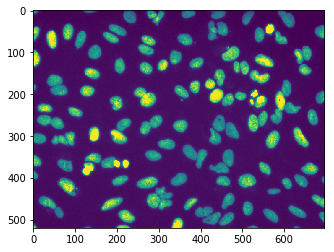

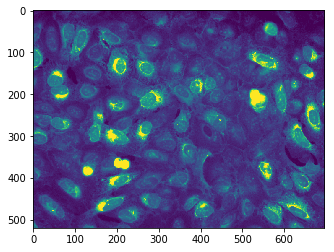

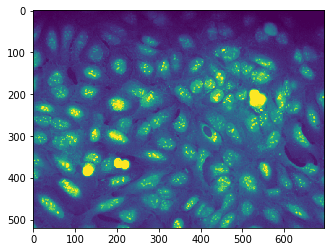

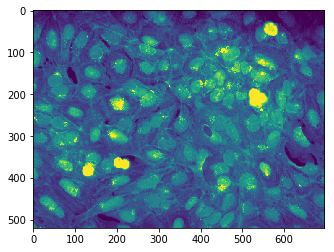

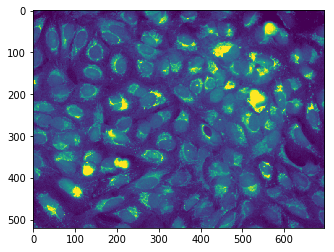

In [7]:
# get color assignment right
if(debug):
    plt.imshow(ch1)
    plt.show()
    plt.imshow(ch2)
    plt.show()
    plt.imshow(ch3)
    plt.show()
    plt.imshow(ch4)
    plt.show()
    plt.imshow(ch5)
    plt.show()

# 1 = blue
# 2 = red
# 3 = yellow
# 4 = orange
# 5 = green

col1 = np.array([0, 0, 255], dtype=np.uint8)
col2 = np.array([255, 0, 0], dtype=np.uint8)
col3 = np.array([255, 255, 0], dtype=np.uint8)
col4 = np.array([255, 150, 0], dtype=np.uint8)
col5 = np.array([0, 255, 0], dtype=np.uint8)

In [8]:
def colorize_image(img, col):
    
    # rescale image
    img_float = img.astype(np.float)
    img_float = img_float / 255

    # colorize
    img_col_float = np.reshape(img_float, img_float.shape + (1,)) * col
    img_col_byte = img_col_float.astype(np.uint8)

    return img_col_byte

In [9]:
# colorize images
ch1_col = colorize_image(ch1, col1)
ch2_col = colorize_image(ch2, col2)
ch3_col = colorize_image(ch3, col3)
ch4_col = colorize_image(ch4, col4)
ch5_col = colorize_image(ch5, col5)

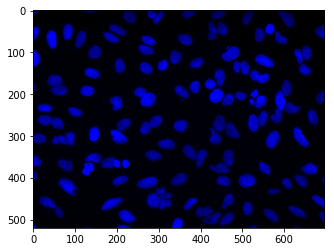

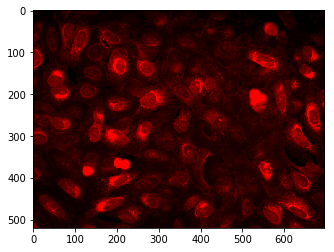

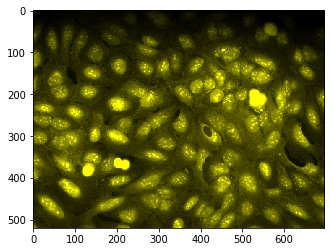

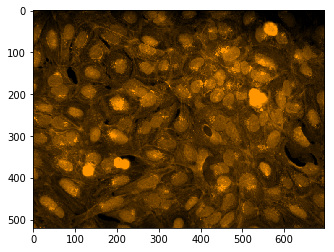

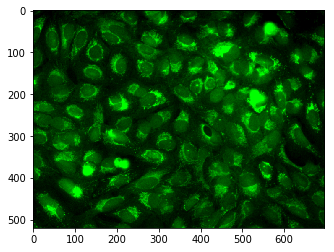

In [10]:
# plot the images
plt.imshow(ch1_col)
plt.show()
plt.imshow(ch2_col)
plt.show()
plt.imshow(ch3_col)
plt.show()
plt.imshow(ch4_col)
plt.show()
plt.imshow(ch5_col)
plt.show()

In [11]:
def mask(img, mask):
    
    print(img.shape)
    print(mask.shape)
    
    imgcopy = np.copy(img)
    
    imgcopy[:,:,0] = imgcopy[:,:,0] * mask
    imgcopy[:,:,1] = imgcopy[:,:,1] * mask
    imgcopy[:,:,2] = imgcopy[:,:,2] * mask
    
    return imgcopy

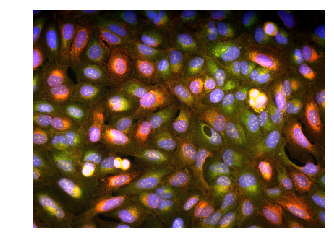

In [12]:
# combine final image

# combination parameteres
fac1 = 13
fac2 = 10
fac3 = 7
fac4 = 1
fac5 = 4

mix = normalize(
    fac1 * ch1_col.astype(np.uint16) +
    fac2 * ch2_col.astype(np.uint16) + 
    fac3 * ch3_col.astype(np.uint16) + 
    fac4 * ch4_col.astype(np.uint16) + 
    fac5 * ch5_col.astype(np.uint16)
)

plt.imshow(mix)
plt.axis('off')
plt.savefig('./art_' + plate + '_' + well + '_' + site + '.png')
plt.show()